# Assignment 1: Data Exploration and Analysis
### Allen Ansari, Chad Madding and Yongjun (Ian) Chu 


## Business Understanding
### Choosing the cadiovascular diseases dataset
Cardiovascular diseases (CVD) are the no. 1 cause of death in US each year. To reduce the death rate, the best approach is by early detection and prevention. An efficeint way would be to predict the probablity of a patient having CVD based on results from medical examinations, such as blood pressure values and glucose content. 

Here, we obtained a CVD dataset from Kaggle. It consists of 70,000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure and CVD status(binary, 1 or 0). The purpose of this dataset was to determine which medical aspects had the most bearing on whether a patient would had CVD or not. 

To mine useful knowledge from the dataset, we will establish a prediction algorithm to find a relationship between a specific attribute or group of attributes and the probability of having CVD for a patient. To measure the effectiveness of the our prediction algorithm, we will use the cross-calidation, along with LOSS function and ROC for accuracy evaluation.

## Data Understanding
### Data Meaning And Type [10 points]
<b>SUCCESS MEASURE</b> <i>Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.</i>

### Exploratory Data Analysis (EDA) of the cadiovascular diseases data

We will be peforming an analysis of the cadiovascular diseases data set found on Kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset). Our analisis will consyst of exploring the statistical summaries of the features, visualizing the attributes, and making conclusions from the visualizations and analysis.

The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results. 

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

|Feature   |Variable Type   |Variable   |Value Type   |
|:---------|:--------------|:---------------|:------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

### Data Quality [15 points]
<b>SUCCESS MEASURE</b> <i>Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.</i>
    * Are those mistakes?
    * How do you deal with these problems?
    * Give justifications for your methods.

Data import and simple cleanup:

In [1]:
import pandas as pd
import numpy as np
import copy
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.style.use('ggplot')

import warnings
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

from pandas.plotting import scatter_matrix

#Bring in data set
df = pd.read_csv('Data/cardio_train.csv', sep=';') #read in the csv file
# The first 5 rows of the dataset
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


We will drop the id column as it will not be needed.

In [2]:
# drop 'id' column 
df.drop('id',axis=1,inplace=True)

Are there any NAs or missing values in a dataset?

In [3]:
df.isnull().values.any()

False

There is some incorrect data in some of the cases. There are several entries where diastolic pressure is higher than systolic.
How many records have inaccurate blood pressure reading?

In [4]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1234 cases


We can remove outliers. There are also a few cases where the blood pressure is negative.

In [5]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

This will take care of the problem where diastolic pressure is higher than systolic.

After cleaning Diastilic pressure is higher than systolic one in 0 cases.


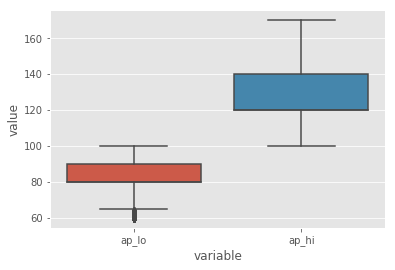

In [6]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("After cleaning Diastilic pressure is higher than systolic one in {0} cases.".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

### Simple Statistics [10 points]
<b>SUCCESS MEASURE</b> <i>Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.</i>

We can now start to look at some simple statistics for the numeric values in the data set.

In [7]:
#A summary of the dataframe
df.info()
#Stats of nominal and continous data
df.describe().T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66193 entries, 0 to 69999
Data columns (total 12 columns):
age            66193 non-null int64
gender         66193 non-null int64
height         66193 non-null int64
weight         66193 non-null float64
ap_hi          66193 non-null int64
ap_lo          66193 non-null int64
cholesterol    66193 non-null int64
gluc           66193 non-null int64
smoke          66193 non-null int64
alco           66193 non-null int64
active         66193 non-null int64
cardio         66193 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.6 MB


,count,mean,std,min,25%,50%,75%,max
age,66193.0,19474.771698,2465.001772,10798.0,17678.0,19708.0,21332.0,23713.0
gender,66193.0,1.350007,0.476975,1.0,1.0,1.0,2.0,2.0
height,66193.0,164.428414,8.153724,55.0,159.0,165.0,170.0,250.0
weight,66193.0,74.094533,14.130058,11.0,65.0,72.0,82.0,200.0
ap_hi,66193.0,126.252519,14.459022,100.0,120.0,120.0,140.0,170.0
ap_lo,66193.0,81.183962,8.403263,60.0,80.0,80.0,90.0,100.0
cholesterol,66193.0,1.360869,0.677058,1.0,1.0,1.0,1.0,3.0
gluc,66193.0,1.223936,0.570739,1.0,1.0,1.0,1.0,3.0
smoke,66193.0,0.087502,0.282571,0.0,0.0,0.0,0.0,1.0
alco,66193.0,0.052906,0.223847,0.0,0.0,0.0,0.0,1.0


### Data Visualization and Attribute Relationships [15 points]
<b>SUCCESS MEASURE</b> <i>Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.</i>

#### EXAMPLE TEXT
A summarization of the numerical data is shown above. The best way to analyze some of this data to compare it is visually. We will take a look at some of the relationships that are garnered from visual plots and see if that can tell us anything about the data set that is not initially visible by just looking at the presented statistics.

The following section shows bar charts and cross tabulations of the relationships between the different attributes and the readmission rates for each group of attributes.  The bar charts are very convenient in that they quickly show the differences between the readmission rates for each grouped attribute.

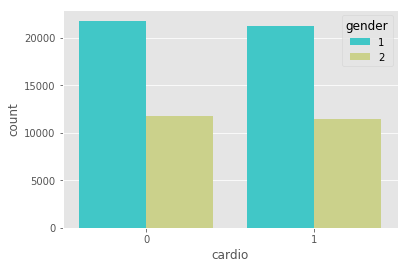

In [8]:
# visualize cardio with gender
sns.countplot(x='cardio',data=df,hue='gender',palette='rainbow')

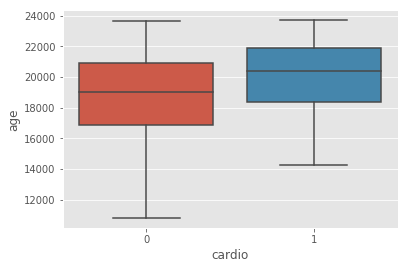

In [9]:
# distribution wrt age
sns.boxplot(x='cardio',y='age',data=df)

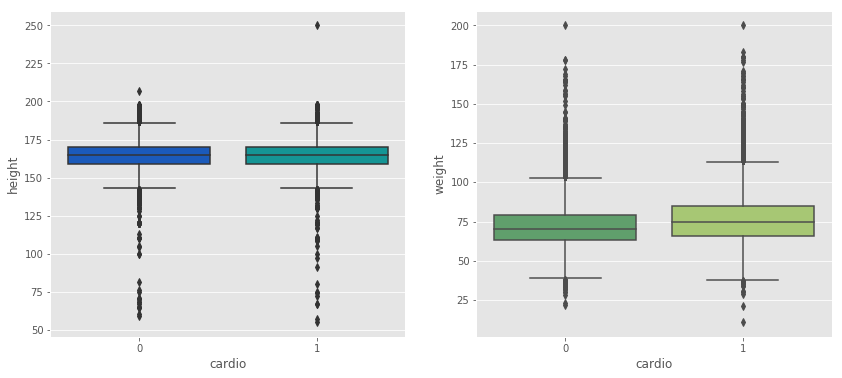

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=df,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=df,palette='summer')

Age is measured in days, height is in centimeters. Let's look ate the numerical variables and how are they spread among target class. For example, at what age does the number of people with CVD exceed the number of people without CVD?

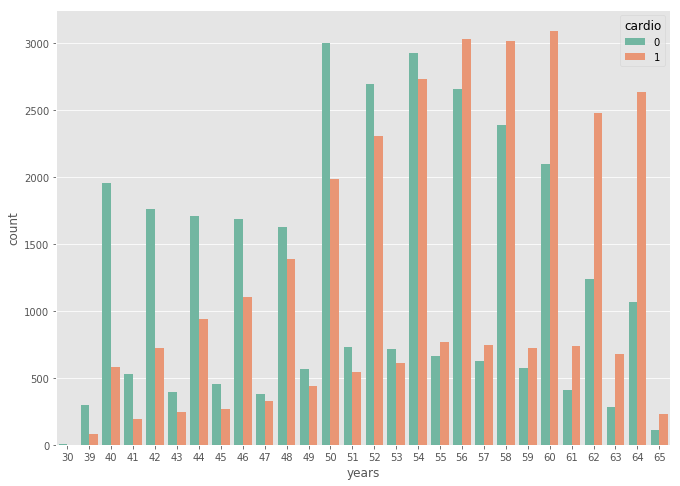

In [11]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD. From the table above, we can see that there are outliers in `ap_hi`, `ap_lo`, `weight` and `height`. We will deal with them later.

Let's look at categorical variables in the dataset and their distribution:

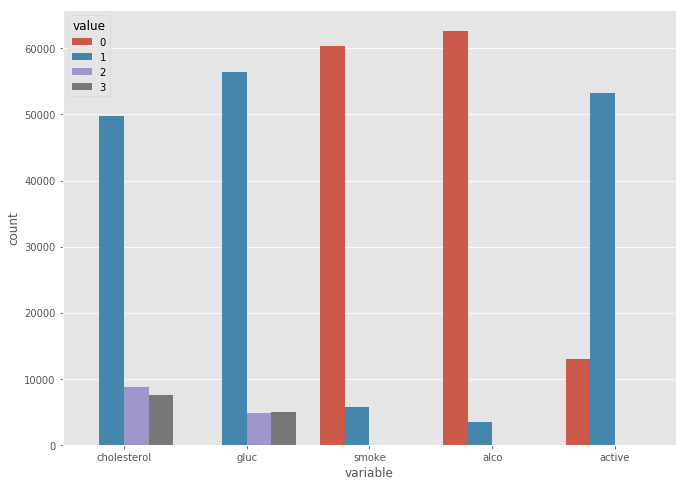

In [12]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

### Explore Joint Attributes [15 points]
<b>SUCCESS MEASURE</b> <i>Explore relationships between attributes: Look at the attributes via scatter
plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain
any interesting relationships.</i>

#### Bivariate analysis
It may be useful to split categorical variables by target class:

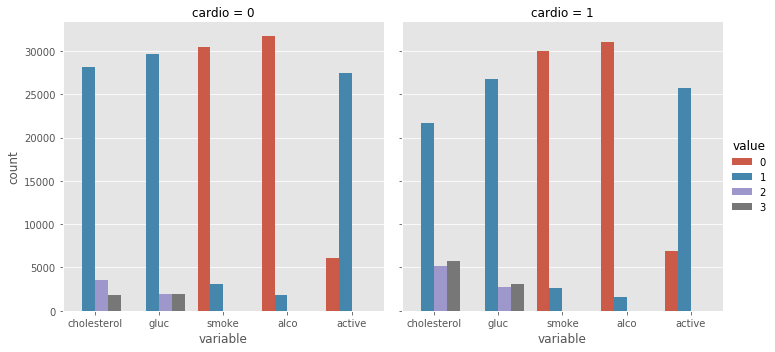

In [13]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

To see how the target class is distributed among men and women, we can use also crosstab

In [14]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.329567,0.177541
1,0.320427,0.172465


### Explore Relationships [10 points]
<b>SUCCESS MEASURE</b> <i>Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).</i>

In [15]:
# divide the counts to get


It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [16]:
df.groupby('gender')['height'].mean()

gender
1    161.465474
2    169.930853
Name: height, dtype: float64

Let's see how many men and women presented in the dataset:

In [17]:
df['gender'].value_counts()

1    43025
2    23168
Name: gender, dtype: int64

In [18]:
# print a chart of the


Who more often report consuming alcohol - men or women?

In [19]:
df.groupby('gender')['alco'].sum()

gender
1    1074
2    2428
Name: alco, dtype: int64

The above shows that for the .

However, the bottom chart illustrates that the data for serum levels are relatively sparse.  

### Interesting Feature

The most interesting feature about the data was the .  

The other interesting feature was that the .

The fact that .  Perhaps it is their diet?

### Other Features That Could Be Added [5 points]
<b>SUCCESS MEASURE</b> <i>Are there other features that could be added to the data or created from existing features? Which ones?</i>

There are more attributes in the data set that could be explored. 

I would be interested in revisiting it and using some of the data reduction techniques discussed in class to consolidate them and see how they affect the readmission rates.  For example, there were many medications that could be correlated against the readmission rate.  And the medical diagnosis codes could be grouped and quantified. Unfortunately I ran out of time on this assignment, and was unable to pursue it further.


## Exceptional Work (10 points total)
<b>SUCCESS MEASURE</b> <i>You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.</i>

PLACEHOLDER for Exceptional Work information.

This is just here for markdown samples

This plain text.


# Header
## Subheader

__bold1__

<b>Bold2</b>

<i>italitics</i>

List of things
- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

$x=5$
